In [1]:
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex
import numpy as np
import scipy.integrate
import controlTheoryToolkit as ctk

In [9]:
A = sp.Matrix([[1, -1], [0, 1]])
B = sp.Matrix([[0], [1]])
C = sp.Matrix([[1, 0]])

l_reg = [-1, -2]
l_det = {1 + sp.I, 1 - sp.I}

display(A)
display(B)
display(C)

Theta = sp.Matrix([[6, -5]])
L = sp.Matrix([[4], [-5]])

symXi = sp.symbols('\\xi_1 \\xi_2', cls=sp.Function)
symX = sp.symbols('x_1 x_2', cls=sp.Function)
symT = sp.symbols('t')


B_1 = A - L * C + B * Theta
A_1 = L * C
B_2 = B * Theta
A_2 = A
display(A_1)
display(B_1)
display(B_2)

Z = sp.Matrix([[A_1, B_1], [A_2, B_2]])
display(Z)

# Eqs = [Eq(symXi[0](t).diff(t), Z[])]



Matrix([
[1, -1],
[0,  1]])

Matrix([
[0],
[1]])

Matrix([[1, 0]])

Matrix([
[ 4, 0],
[-5, 0]])

Matrix([
[-3, -1],
[11, -4]])

Matrix([
[0,  0],
[6, -5]])

Matrix([
[ 4,  0, -3, -1],
[-5,  0, 11, -4],
[ 1, -1,  0,  0],
[ 0,  1,  6, -5]])

Text(0.5, 0.98, 'Система $x$, $\\xi$')

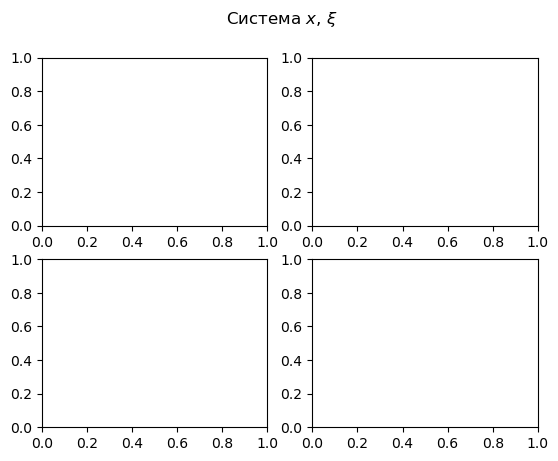

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Система $x$, $\\xi$')



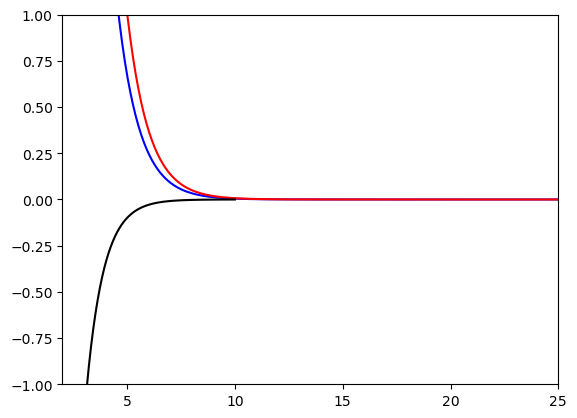

In [11]:
y = sp.symbols('y')
dYdt = -y
t = sp.symbols('t')

fig, ax = plt.subplots()
sols = []

def calc(y_0, color):
    rhs = sp.lambdify((t, y), dYdt)
    T = np.linspace(0, 25, 200)
    sol = scipy.integrate.solve_ivp(rhs, (0, 25), [y_0], t_eval=T)
    ax.plot(T, sol.y.T, color=color)
    sols.append(sol.y.T)

calc(100, 'b')
calc(150, 'r')

ax.set_xlim(2, 25)
ax.set_ylim(-1, 1)

ax.plot(T, [sols[0][i] - sols[1][i] for i in range(100)], 'k')
plt.show()

In [12]:
A = sp.Matrix([[0, 1, 0], [0, 1, 1], [0, 0, 0]], real=True)
B = sp.Matrix([[0], [0], [1]], real=True)
C = sp.Matrix([[1, 0, 0], [0, 0, 1]], real=True)
Q = sp.Matrix([[1, 0, 0], [0, 0, 0], [0, 0, 1]], real=True)
R = 1

display(sp.Matrix([[B, A*B, A*A*B]]))
display(sp.Matrix([[C], [C*A]]))

xs = sp.symbols('x:6')

X = sp.Matrix([[xs[0], xs[1], xs[2]], [xs[1], xs[3], xs[4]], [xs[2], xs[4] ,xs[5]]], real=True)
# X = sp.MatrixSymbol('X', 3, 3)
ri = Q + A.T * X + X*A - X*B*1 * B.T * X
display(ri)
sol = sp.solve(ri, X)
display(sol)
display(X)

Matrix([
[0, 0, 1],
[0, 1, 1],
[1, 0, 0]])

Matrix([
[1, 0, 0],
[0, 0, 1],
[0, 1, 0],
[0, 0, 0]])

Matrix([
[      1 - x2**2,      x0 + x1 - x2*x4,           x1 - x2*x5],
[x0 + x1 - x2*x4,  2*x1 + 2*x3 - x4**2, x2 + x3 - x4*x5 + x4],
[     x1 - x2*x5, x2 + x3 - x4*x5 + x4,     2*x4 - x5**2 + 1]])

KeyboardInterrupt: 

In [ ]:
approx_sols = []
for s in sol:
    t = []
    for x in s:
        t.append(x.evalf())
    approx_sols.append(sp.Matrix([[t[0], t[1], t[2]], [t[1], t[3], t[4]], [t[2], t[4] ,t[5]]]))

for x in approx_sols:
    evals = x.eigenvals()
    is_sol = False
    for v in evals:
        if not v.is_real:
            is_sol = False
            break
        if  v <= 0:
            is_sol = False
            break
    if is_sol:
        X = x

# display(approx_sols)
display(X)

Matrix([
[x0, x1, x2],
[x1, x3, x4],
[x2, x4, x5]])

In [ ]:
A = sp.Matrix([[0, 1, 0], [0, 1, 1], [0, 0, 0]], real=True)
B = sp.Matrix([[0], [0], [1]], real=True)
C = sp.Matrix([[1, 0, 0], [0, 0, 1]], real=True)
Q = sp.Matrix([[1, 0, 0], [0, 0, 0], [0, 0, 1]], real=True)
R = sp.Matrix([[1]])


In [ ]:

display(ctk.AlgebraicRiccatiSol(A, B, Q, R))

Matrix([
[2.50975533249339, 3.64943591448949,              1.0],
[3.64943591448949, 15.3183824939658, 6.15919124698288],
[             1.0, 6.15919124698288, 6.15919124698288]])

Matrix([
[2*t**3 - 10*x[0, 0] + x[2, 0] + 1],
[                    t + 3*x[2, 0]],
[        2*t - x[1, 0] + 2*x[2, 0]]])

array([[ 1.10000000e+00,  4.04224685e-01,  1.56709855e-01,
         7.31003165e-02,  5.10740573e-02,  5.46387877e-02,
         7.23780969e-02,  1.02155726e-01,  1.45706871e-01,
         2.06364544e-01,  2.87939062e-01,  3.96414735e-01,
         5.35485643e-01,  7.12677055e-01,  9.33264505e-01,
         1.20325549e+00,  1.53220067e+00,  1.92180730e+00,
         2.38764924e+00,  2.92564003e+00,  3.55796708e+00,
         4.27399364e+00,  5.10301140e+00,  6.02644887e+00,
         7.08254713e+00,  8.24171640e+00,  9.55481671e+00,
         1.09771996e+01,  1.25758512e+01,  1.42897925e+01,
         1.62003588e+01,  1.82382863e+01,  2.04850864e+01,
         2.28874612e+01,  2.54953222e+01,  2.83133986e+01,
         3.13147021e+01,  3.46086635e+01,  3.80576135e+01,
         4.18850418e+01,  4.58827987e+01,  5.03015273e+01,
         5.50045079e+01,  6.01003853e+01,  6.56954089e+01,
         7.16165314e+01,  7.82690974e+01,  8.52864926e+01,
         9.31293499e+01,  1.01636234e+02,  1.10862258e+0

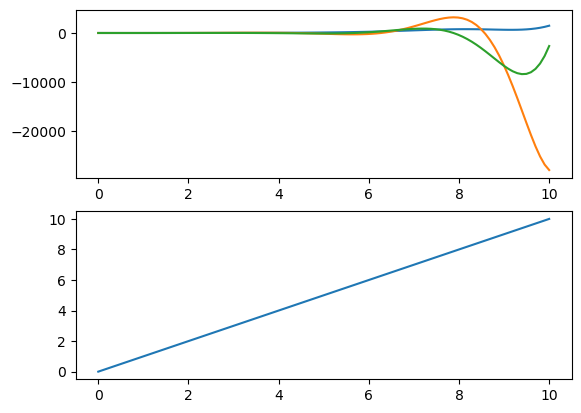

In [3]:
x = sp.MatrixSymbol('x', 3, 1).as_explicit()
t = sp.symbols('t', real=True)
A = sp.Matrix([[-10, 0, 1], [0, 0, 3], [0, -1, 2]], real=True)
b = sp.Matrix([[1 + 2* t**3], [t], [2 * t]])
u = sp.Matrix([t])

display(A * x + b)
T = np.linspace(0, 10, 100)
solution, U = ctk.solveLinearSystem(t, x, A, u, b, [1.1, 0.1, 0], (0, 10), T)
display(solution.y)

fig, ax = plt.subplots(2)
ax[0].plot(T, solution.y.T)
ax[1].plot(T, U)
plt.show()
